In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
import pickle

In [31]:
def transport_delay(data, tau, time_step, initial_value):
    """
    Applies a transport delay to a 1D NumPy array of time series data.

    Parameters:
    - data: 1D NumPy array containing the time series data.
    - tau: The delay in seconds.
    - time_step: The time step between consecutive samples in seconds.
    - initial_value: The value to fill in the delayed portion of the array.

    Returns:
    - delayed_data: The array with the applied delay.
    """
    if not isinstance(data, np.ndarray):
        raise ValueError("data should be a NumPy array")

    if data.ndim != 1:
        raise ValueError("data should be a 1D array")

    # Calculate the number of samples to delay
    delay_steps = int(round(tau / time_step))
    

    # Ensure delay_steps is non-negative
    delay_steps = max(delay_steps, 0)

    # Create an array with the same shape as data, filled with initial_value
    delayed_data = np.full_like(data, initial_value)

    # Apply the delay by shifting the data array
    if delay_steps < len(data):
        delayed_data[delay_steps:] = data[:-delay_steps]
    else:
        # If delay_steps is larger than the data length, return all initial values
        delayed_data = np.full_like(data, initial_value)

    return delayed_data

# Load in Nate data 1

In [ ]:
import torch
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\6 DOF Simulator data\LB simulator data\test1_sept17_flightprofile1\sept17nate1.csv"
data = pd.read_csv(file_path)
# Remove ' sec' and convert the column to a numeric type
data['Time'] = data['Time'].str.replace(' sec', '').astype(float)
data_downsample = data.to_numpy()[::100,:] #downsample to 0.1 sec
empty_array = np.empty(data_downsample.shape[0],)
empty_array[0:10] = 0
empty_array[10:150] = 8
empty_array[150:250] = 1
empty_array[250:380] = 4
empty_array[380:500] = -4
empty_array[500:650] = 12
empty_array[650:750] = 4
empty_array[750:850] = 6
empty_array[850:] = -4
pitch_error = data_downsample[:,2] - empty_array
import math
deg_rad_factor = math.pi/180

pitch_cmd_tensor = torch.tensor(empty_array*deg_rad_factor, dtype=torch.float32)
pitch_error_tensor_1 = torch.tensor(pitch_error*deg_rad_factor, dtype=torch.float32)
pitch_out_tensor = torch.tensor(data_downsample[:,2]*deg_rad_factor, dtype=torch.float32)
time_tensor = torch.tensor(data_downsample[:,0], dtype=torch.float32)
pilot_output_tensor_1 = torch.tensor(data_downsample[:,1], dtype=torch.float32)

pitch_cmd_norm = (pitch_cmd_tensor - pitch_cmd_tensor.min()) / (pitch_cmd_tensor.max() - pitch_cmd_tensor.min())
pitch_out_norm = (pitch_out_tensor - pitch_out_tensor.min()) / (pitch_out_tensor.max() - pitch_out_tensor.min())
pitch_error_norm = (pitch_error_tensor_1 - pitch_error_tensor_1.min()) / (pitch_error_tensor_1.max() - pitch_error_tensor_1.min())
time_norm = (time_tensor - time_tensor.min()) / (time_tensor.max() - time_tensor.min())
pilot_output_norm = (pilot_output_tensor_1 - pilot_output_tensor_1.min()) / (pilot_output_tensor_1.max() - pilot_output_tensor_1.min())

start=0
finish=1000
X_1 = (torch.cat((pitch_cmd_norm[start:finish].view(-1,1),pitch_out_norm[start:finish].view(-1,1),pitch_error_norm[start:finish].view(-1,1),pilot_output_norm[start:finish].view(-1,1), time_norm[start:finish].view(-1,1)),dim=1))
Xflattened_1 = X_1.view(-1)
X_1.shape, Xflattened_1.shape

(torch.Size([1000, 5]), torch.Size([5000]))

# Load in Nate data 2

In [5]:
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\6 DOF Simulator data\LB simulator data\test2_sept17_flightprofile1\sept17nate2.csv"
data = pd.read_csv(file_path)

# Remove ' sec' and convert the column to a numeric type
data['Time'] = data['Time'].str.replace(' sec', '').astype(float)

data_downsample = data.to_numpy()[::100,:] #downsample to 0.1 sec

empty_array = np.empty(data_downsample.shape[0],)
empty_array[0:10] = 0
empty_array[10:150] = 8
empty_array[150:250] = 1
empty_array[250:380] = 4
empty_array[380:500] = -4
empty_array[500:650] = 12
empty_array[650:750] = 4
empty_array[750:850] = 6
empty_array[850:] = -4

pitch_error = data_downsample[1200:1200+1000,2] - empty_array[:1000]

import math
deg_rad_factor = math.pi/180

pitch_cmd_tensor = torch.tensor(empty_array[:1000]*deg_rad_factor, dtype=torch.float32)
pitch_error_tensor_2 = torch.tensor(pitch_error[:1000]*deg_rad_factor, dtype=torch.float32)
pitch_out_tensor = torch.tensor(data_downsample[1200:1200+1000,2]*deg_rad_factor, dtype=torch.float32)
time_tensor = torch.tensor(data_downsample[1200:1200+1000,0], dtype=torch.float32)
pilot_output_tensor_2 = torch.tensor(data_downsample[1200:1200+1000,1], dtype=torch.float32)

pitch_cmd_norm = (pitch_cmd_tensor - pitch_cmd_tensor.min()) / (pitch_cmd_tensor.max() - pitch_cmd_tensor.min())
pitch_out_norm = (pitch_out_tensor - pitch_out_tensor.min()) / (pitch_out_tensor.max() - pitch_out_tensor.min())
pitch_error_norm = (pitch_error_tensor_2 - pitch_error_tensor_2.min()) / (pitch_error_tensor_2.max() - pitch_error_tensor_2.min())
time_norm = (time_tensor - time_tensor.min()) / (time_tensor.max() - time_tensor.min())
pilot_output_norm = (pilot_output_tensor_2 - pilot_output_tensor_2.min()) / (pilot_output_tensor_2.max() - pilot_output_tensor_2.min())

start=0
finish=1000
X_2 = (torch.cat((pitch_cmd_norm[start:finish].view(-1,1),pitch_out_norm[start:finish].view(-1,1),pitch_error_norm[start:finish].view(-1,1),pilot_output_norm[start:finish].view(-1,1), time_norm[start:finish].view(-1,1)),dim=1))

Xflattened_2 = X_2.view(-1)

X_2.shape, Xflattened_2.shape


(torch.Size([1000, 5]), torch.Size([5000]))

# Load in Nate data 3

In [10]:
file_path = r"C:\Users\steph\Downloads\nov7nate_1.csv"
data = pd.read_csv(file_path)

# Remove ' sec' and convert the column to a numeric type
data['Time'] = data['Time'].str.replace(' sec', '').astype(float)

data_downsample = data.to_numpy()[::100,:] #downsample to 0.1 sec

empty_array = np.empty(data_downsample.shape[0],)
empty_array[0:10] = 0
empty_array[10:150] = 8
empty_array[150:250] = 1
empty_array[250:380] = 4
empty_array[380:500] = -4
empty_array[500:650] = 12
empty_array[650:750] = 4
empty_array[750:850] = 6
empty_array[850:] = -4

pitch_error = data_downsample[:,2] - empty_array

import math
deg_rad_factor = math.pi/180

pitch_cmd_tensor = torch.tensor(empty_array*deg_rad_factor, dtype=torch.float32)
pitch_error_tensor_3 = torch.tensor(pitch_error*deg_rad_factor, dtype=torch.float32)
pitch_out_tensor = torch.tensor(data_downsample[:,2]*deg_rad_factor, dtype=torch.float32)
time_tensor = torch.tensor(data_downsample[:,0], dtype=torch.float32)
pilot_output_tensor_3 = torch.tensor(data_downsample[:,1], dtype=torch.float32)

pitch_cmd_norm = (pitch_cmd_tensor - pitch_cmd_tensor.min()) / (pitch_cmd_tensor.max() - pitch_cmd_tensor.min())
pitch_out_norm = (pitch_out_tensor - pitch_out_tensor.min()) / (pitch_out_tensor.max() - pitch_out_tensor.min())
pitch_error_norm = (pitch_error_tensor_2 - pitch_error_tensor_2.min()) / (pitch_error_tensor_2.max() - pitch_error_tensor_2.min())
time_norm = (time_tensor - time_tensor.min()) / (time_tensor.max() - time_tensor.min())
pilot_output_norm = (pilot_output_tensor_2 - pilot_output_tensor_2.min()) / (pilot_output_tensor_2.max() - pilot_output_tensor_2.min())

start=0
finish=1000
X_3 = (torch.cat((pitch_cmd_norm[start:finish].view(-1,1),pitch_out_norm[start:finish].view(-1,1),pitch_error_norm[start:finish].view(-1,1),pilot_output_norm[start:finish].view(-1,1), time_norm[start:finish].view(-1,1)),dim=1))

Xflattened_3 = X_3.view(-1)

X_3.shape, Xflattened_3.shape

(torch.Size([1000, 5]), torch.Size([5000]))

# Test the models

## Ridge

In [89]:
# Load the model
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_ridge.pkl"
ridge_loaded = joblib.load(file_path)

ridge_preds_1 = ridge_loaded.predict(Xflattened_1.reshape(1,-1))
ridge_preds_2 = ridge_loaded.predict(Xflattened_2.reshape(1,-1))
ridge_preds_3 = ridge_loaded.predict(Xflattened_3.reshape(1,-1))

ridge_preds_1 =  ridge_loaded.predict(np.array(Xflattened_1).reshape(1,-1)).squeeze()
xp,params = ridge_preds_1[:1000], ridge_preds_1[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_ridge_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

ridge_preds_2 =  ridge_loaded.predict(np.array(Xflattened_2).reshape(1,-1)).squeeze()
xp,params = ridge_preds_2[:1000], ridge_preds_2[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_ridge_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

ridge_preds_3 =  ridge_loaded.predict(np.array(Xflattened_3).reshape(1,-1)).squeeze()
xp,params = ridge_preds_3[:1000], ridge_preds_3[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_ridge_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

from sklearn.metrics import mean_squared_error
mean_squared_error(pilot_output_tensor_1[:1000],pilot_estimated_ridge_1), mean_squared_error(pilot_output_tensor_2[:1000],pilot_estimated_ridge_2), mean_squared_error(pilot_output_tensor_3[:1000],pilot_estimated_ridge_3-0.05)

(0.004127370174045776, 0.004151364001708483, 0.0013191040803020675)

## DT

In [90]:
# Load the model
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_dt.pkl"
dt_loaded = joblib.load(file_path)

dt_preds_1 = dt_loaded.predict(Xflattened_1.reshape(1,-1))
dt_preds_2 = dt_loaded.predict(Xflattened_2.reshape(1,-1))
dt_preds_3 = dt_loaded.predict(Xflattened_3.reshape(1,-1))

dt_preds_1 =  dt_loaded.predict(np.array(Xflattened_1).reshape(1,-1)).squeeze()
xp,params = dt_preds_1[:1000], dt_preds_1[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_dt_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

dt_preds_2 =  dt_loaded.predict(np.array(Xflattened_2).reshape(1,-1)).squeeze()
xp,params = dt_preds_2[:1000], dt_preds_2[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_dt_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

dt_preds_3 =  dt_loaded.predict(np.array(Xflattened_3).reshape(1,-1)).squeeze()
xp,params = dt_preds_3[:1000], dt_preds_3[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_dt_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

from sklearn.metrics import mean_squared_error
mean_squared_error(pilot_output_tensor_1[:1000],pilot_estimated_dt_1), mean_squared_error(pilot_output_tensor_2[:1000],pilot_estimated_dt_1), mean_squared_error(pilot_output_tensor_3[:1000],pilot_estimated_dt_1-.05)

(0.00363672266940707, 0.004084762836340727, 0.0015435377357705972)

## KNN

In [91]:
# Load the model
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_knn.pkl"
knn_loaded = joblib.load(file_path)

knn_preds_1 = knn_loaded.predict(Xflattened_1.reshape(1,-1))
knn_preds_2 = knn_loaded.predict(Xflattened_2.reshape(1,-1))
knn_preds_3 = knn_loaded.predict(Xflattened_3.reshape(1,-1))

knn_preds_1 =  knn_loaded.predict(np.array(Xflattened_1).reshape(1,-1)).squeeze()
xp,params = knn_preds_1[:1000], knn_preds_1[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_knn_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

knn_preds_2 =  knn_loaded.predict(np.array(Xflattened_2).reshape(1,-1)).squeeze()
xp,params = knn_preds_2[:1000], knn_preds_2[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_knn_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

knn_preds_3 =  knn_loaded.predict(np.array(Xflattened_3).reshape(1,-1)).squeeze()
xp,params = knn_preds_3[:1000], knn_preds_3[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_knn_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

from sklearn.metrics import mean_squared_error
mean_squared_error(pilot_output_tensor_1[:1000],pilot_estimated_knn_1), mean_squared_error(pilot_output_tensor_2[:1000],pilot_estimated_knn_2), mean_squared_error(pilot_output_tensor_3[:1000],pilot_estimated_knn_3-.05)

(0.003486702055384878, 0.0036957761934103706, 0.0010812165974326195)

## RF

In [92]:
# Load the model
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_rf.pkl"
rf_loaded = joblib.load(file_path)

rf_preds_1 = rf_loaded.predict(Xflattened_1.reshape(1,-1))
rf_preds_2 = rf_loaded.predict(Xflattened_2.reshape(1,-1))
rf_preds_3 = rf_loaded.predict(Xflattened_3.reshape(1,-1))

rf_preds_1 =  rf_loaded.predict(np.array(Xflattened_1).reshape(1,-1)).squeeze()
xp,params = rf_preds_1[:1000], rf_preds_1[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_rf_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

rf_preds_2 =  rf_loaded.predict(np.array(Xflattened_2).reshape(1,-1)).squeeze()
xp,params = rf_preds_2[:1000], rf_preds_2[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_rf_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

rf_preds_3 =  rf_loaded.predict(np.array(Xflattened_3).reshape(1,-1)).squeeze()
xp,params = rf_preds_3[:1000], rf_preds_3[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_rf_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

from sklearn.metrics import mean_squared_error
mean_squared_error(pilot_output_tensor_1[:1000],pilot_estimated_rf_1), mean_squared_error(pilot_output_tensor_2[:1000],pilot_estimated_rf_2), mean_squared_error(pilot_output_tensor_3[:1000],pilot_estimated_rf_3-0.05)

(0.0035284001097135027, 0.0038941592193270217, 0.001292026785158234)

## SVR

In [93]:
# Load the model
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\X_train.csv"
X_train = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\X_test.csv"
X_test = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\y_train.csv"
y_train = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\y_test.csv"
y_test = pd.read_csv(file_path, header = None).to_numpy()

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# Initialize and train MultiOutputRegressor with SVR
svr = SVR()
svr_loaded = MultiOutputRegressor(svr)

svr_loaded.fit(X_train, y_train)

svr_preds_1 = svr_loaded.predict(Xflattened_1.reshape(1,-1))
svr_preds_2 = svr_loaded.predict(Xflattened_2.reshape(1,-1))
svr_preds_3 = svr_loaded.predict(Xflattened_3.reshape(1,-1))

svr_preds_1 =  svr_loaded.predict(np.array(Xflattened_1).reshape(1,-1)).squeeze()
xp,params = svr_preds_1[:1000], svr_preds_1[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_svr_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

svr_preds_2 =  svr_loaded.predict(np.array(Xflattened_2).reshape(1,-1)).squeeze()
xp,params = svr_preds_2[:1000], svr_preds_2[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_svr_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

svr_preds_3 =  svr_loaded.predict(np.array(Xflattened_3).reshape(1,-1)).squeeze()
xp,params = svr_preds_3[:1000], svr_preds_3[-4000:]
tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
pilot_estimated_svr_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay((np.array(pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

from sklearn.metrics import mean_squared_error
mean_squared_error(pilot_output_tensor_1[:1000],pilot_estimated_svr_1), mean_squared_error(pilot_output_tensor_2[:1000],pilot_estimated_svr_2), mean_squared_error(pilot_output_tensor_3[:1000],pilot_estimated_svr_3-0.05)

KeyboardInterrupt: 

## Dense NN with no physics

In [94]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch.nn.functional as F
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_dense_nn_no_physics.pth"
# Create dense model
class DenseModel(nn.Module):
    def __init__(self):
        super(DenseModel, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(5000, 256)
        #self.layer2 = nn.Linear(256, 256)
        #self.layer3 = nn.Linear(256, 256)
        self.layer2 = nn.Linear(256, 512)
        self.layer3 = nn.Linear(512, 5000)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        #x = torch.relu(self.layer3(x))
        #x = torch.relu(self.layer4(x))
        x = self.layer3(x)
        x[3000:4000] = 0.1 + 0.9 * torch.sigmoid(x[3000:4000])
        return x

# Create an instance of the model
model_1 = DenseModel()

state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)


C:\Users\steph\AppData\Local\Temp\ipykernel_14696\670894335.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [33]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def transport_delay_tensor(data, tau, time_step, initial_value):
    """
    Applies a transport delay to a 1D tensor of time series data.

    Parameters:
    - data: 1D PyTorch tensor containing the time series data.
    - tau: The delay in seconds.
    - time_step: The time step between consecutive samples in seconds.
    - initial_value: The value to fill in the delayed portion of the tensor.

    Returns:
    - delayed_data: The tensor with the applied delay.
    """
    if not isinstance(data, torch.Tensor):
        raise ValueError("data should be a PyTorch tensor")

    if data.dim() != 1:
        raise ValueError("data should be a 1D tensor")

    # Calculate the number of samples to delay
    #delay_steps = int(round(tau / time_step))
    delay_steps = (int((tau / time_step)))

    # Ensure delay_steps is non-negative
    delay_steps = max(delay_steps, 0)

    # Create a tensor with the same shape as data, filled with initial_value
    delayed_data = torch.full_like(data, initial_value)

    # Apply the delay by shifting the data tensor
    if delay_steps < len(data):
        delayed_data[delay_steps:] = data[:-delay_steps]
    else:
        # If delay_steps is larger than the data length, return all initial values
        delayed_data = torch.full_like(data, initial_value)

    return delayed_data

In [95]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(Xflattened_1)
    xp,params = dense_nn_preds_1[:1000], dense_nn_preds_1[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(Xflattened_2)
    xp,params = dense_nn_preds_2[:1000], dense_nn_preds_2[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(Xflattened_3)
    xp,params = dense_nn_preds_3[:1000], dense_nn_preds_3[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_dense_nn_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_dense_nn_2), mean_squared_error(pilot_output_tensor_3[:1000], pilot_estimated_dense_nn_3-0.05)


(0.0050967904, 0.004639315, 0.002290052)

## Dense NN with Physics

In [96]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch.nn.functional as F
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_dense_nn_with_physics.pth"
# Create dense model
class DenseModel(nn.Module):
    def __init__(self):
        super(DenseModel, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(5000, 256)
        #self.layer2 = nn.Linear(256, 256)
        #self.layer3 = nn.Linear(256, 256)
        self.layer2 = nn.Linear(256, 512)
        self.layer3 = nn.Linear(512, 5000)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        #x = torch.relu(self.layer3(x))
        #x = torch.relu(self.layer4(x))
        x = self.layer3(x)
        x[3000:4000] = 0.1 + 0.9 * torch.sigmoid(x[3000:4000])
        return x

# Create an instance of the model
model_1 = DenseModel()

state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)


C:\Users\steph\AppData\Local\Temp\ipykernel_14696\3429822095.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [97]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(Xflattened_1)
    xp,params = dense_nn_preds_1[:1000], dense_nn_preds_1[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_pi_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(Xflattened_2)
    xp,params = dense_nn_preds_2[:1000], dense_nn_preds_2[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_pi_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(Xflattened_3)
    xp,params = dense_nn_preds_3[:1000], dense_nn_preds_3[1000:]
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_dense_nn_pi_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_dense_nn_pi_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_dense_nn_pi_2), mean_squared_error(pilot_output_tensor_3[:1000], pilot_estimated_dense_nn_pi_3-0.05)

(0.0042481353, 0.0040168413, 0.0016479631)

## RNN with no physics

In [98]:
# RNN model
class BasicRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(BasicRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity="tanh")

        # Define fully connected layers for the output
        self.fc1 = nn.Linear(hidden_size, hidden_size)  # Hidden size reduced by half
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer

        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # hidden state

        # Forward pass through RNN layer
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]  # Shape: (batch_size, hidden_size)

        # Apply ReLU activation
        out = self.relu(out)

        # Pass through the first fully connected layer
        out = self.fc1(out)
        out = self.relu(out)

        # Pass through the second fully connected layer (output layer)
        out = self.fc2(out)

        return out

# Example Usage:
# Define parameters
input_size = 5       # Number of input features
hidden_size = 64     # Number of hidden units
output_size = 5000   # Output dimension
num_layers = 1       # Number of RNN layers

# Create an instance of the model
model_1 = BasicRNNModel(input_size, hidden_size, output_size, num_layers)

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_rnn_no_physics.pth"
state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)

C:\Users\steph\AppData\Local\Temp\ipykernel_14696\998623884.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [99]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(X_1.unsqueeze(0))
    xp,params= dense_nn_preds_1[:,:1000].squeeze() , dense_nn_preds_1[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(X_2.unsqueeze(0))
    xp,params = dense_nn_preds_2[:,:1000].squeeze() , dense_nn_preds_2[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(X_3.unsqueeze(0))
    xp,params = dense_nn_preds_3[:,:1000].squeeze() , dense_nn_preds_3[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_rnn_nn_pi_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_rnn_nn_pi_2), mean_squared_error(pilot_output_tensor_3[:1000], pilot_estimated_rnn_nn_pi_3-0.05)

(0.0035668993, 0.004006934, 0.0014151084)

In [48]:
xp.shape, params.shape

(torch.Size([1, 1000]), torch.Size([1, 4000]))

## RNN with Physics

In [102]:
# RNN model
class BasicRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(BasicRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity="tanh")

        # Define fully connected layers for the output
        self.fc1 = nn.Linear(hidden_size, hidden_size)  # Hidden size reduced by half
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer

        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # hidden state

        # Forward pass through RNN layer
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]  # Shape: (batch_size, hidden_size)

        # Apply ReLU activation
        out = self.relu(out)

        # Pass through the first fully connected layer
        out = self.fc1(out)
        out = self.relu(out)

        # Pass through the second fully connected layer (output layer)
        out = self.fc2(out)

        return out

# Example Usage:
# Define parameters
input_size = 5       # Number of input features
hidden_size = 64     # Number of hidden units
output_size = 5000   # Output dimension
num_layers = 1       # Number of RNN layers

# Create an instance of the model
model_1 = BasicRNNModel(input_size, hidden_size, output_size, num_layers)

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_rnn_with_physics.pth"
state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)

C:\Users\steph\AppData\Local\Temp\ipykernel_14696\555937465.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [103]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(X_1.unsqueeze(0))
    xp,params= dense_nn_preds_1[:,:1000].squeeze() , dense_nn_preds_1[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_pi_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(X_2.unsqueeze(0))
    xp,params = dense_nn_preds_2[:,:1000].squeeze() , dense_nn_preds_2[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_pi_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(X_3.unsqueeze(0))
    xp,params = dense_nn_preds_3[:,:1000].squeeze() , dense_nn_preds_3[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_rnn_nn_pi_pi_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_rnn_nn_pi_pi_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_rnn_nn_pi_pi_2), mean_squared_error(pilot_output_tensor_3[:1000], pilot_estimated_rnn_nn_pi_pi_3-0.05)

(0.0035862145, 0.0040271827, 0.0014180458)

## CNN with no physics

In [100]:
# CNN model

class BasicCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(BasicCNNModel, self).__init__()
        
        # Convolutional Layer
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=hidden_size, kernel_size=10, padding=1)
        
        # Define a fully connected hidden layer
        self.fc_hidden = nn.Linear(hidden_size, hidden_size)
        
        # ReLU activation
        self.relu = nn.ReLU()
        
        # Output layer
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # (Batch, Seq_len, Features) -> (Batch, Features, Seq_len) for Conv1d
        x = x.permute(0, 2, 1)
        
        # Apply Convolutional layer
        out = self.conv1(x)
        
        # Apply ReLU activation
        out = self.relu(out)
        
        # Apply Global Max Pooling (collapse sequence dimension)
        out, _ = torch.max(out, dim=2)
        
        # Pass through the fully connected hidden layer
        out = self.fc_hidden(out)
        out = self.relu(out)

        # Pass through the output layer
        out = self.fc_output(out)
        
        # Apply sigmoid scaling to specific indices
        #out[:, 750:1000] = torch.sigmoid(out[:, 750:1000]) * 0.9 + 0.1  # Scale between 0.1 and 1

        return out

# Example Usage:
# Define parameters
input_size = 5  # Number of input features
hidden_size = 128  # Number of hidden units (out_channels for CNN)
output_size = 5000   # Output dimension (for regression, binary classification, etc.)
num_layers = 1    # (Not needed for CNN, but kept to mirror LSTM)

# Create an instance of the CNN model
model_1 = BasicCNNModel(input_size, hidden_size, output_size, num_layers)

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_cnn_no_physics.pth"
state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)

C:\Users\steph\AppData\Local\Temp\ipykernel_14696\2951666861.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [101]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(X_1.unsqueeze(0))
    xp,params= dense_nn_preds_1[:,:1000].squeeze() , dense_nn_preds_1[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(X_2.unsqueeze(0))
    xp,params = dense_nn_preds_2[:,:1000].squeeze() , dense_nn_preds_2[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(X_3.unsqueeze(0))
    xp,params = dense_nn_preds_3[:,:1000].squeeze() , dense_nn_preds_3[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_cnn_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_cnn_2), mean_squared_error(pilot_output_tensor_3[:1000], pilot_estimated_cnn_3-0.05)

(0.0036143442, 0.0039909338, 0.0017903316)

## CNN with physics

In [104]:
# CNN model

class BasicCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(BasicCNNModel, self).__init__()
        
        # Convolutional Layer
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=hidden_size, kernel_size=10, padding=1)
        
        # Define a fully connected hidden layer
        self.fc_hidden = nn.Linear(hidden_size, hidden_size)
        
        # ReLU activation
        self.relu = nn.ReLU()
        
        # Output layer
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # (Batch, Seq_len, Features) -> (Batch, Features, Seq_len) for Conv1d
        x = x.permute(0, 2, 1)
        
        # Apply Convolutional layer
        out = self.conv1(x)
        
        # Apply ReLU activation
        out = self.relu(out)
        
        # Apply Global Max Pooling (collapse sequence dimension)
        out, _ = torch.max(out, dim=2)
        
        # Pass through the fully connected hidden layer
        out = self.fc_hidden(out)
        out = self.relu(out)

        # Pass through the output layer
        out = self.fc_output(out)
        
        # Apply sigmoid scaling to specific indices
        #out[:, 750:1000] = torch.sigmoid(out[:, 750:1000]) * 0.9 + 0.1  # Scale between 0.1 and 1

        return out

# Example Usage:
# Define parameters
input_size = 5  # Number of input features
hidden_size = 128  # Number of hidden units (out_channels for CNN)
output_size = 5000   # Output dimension (for regression, binary classification, etc.)
num_layers = 1    # (Not needed for CNN, but kept to mirror LSTM)

# Create an instance of the CNN model
model_1 = BasicCNNModel(input_size, hidden_size, output_size, num_layers)

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\vscodes\scitechpaper1 nn models for simulator\scitechpaper1_cnn_with_physics.pth"
state_dict = torch.load(file_path)
model_1.load_state_dict(state_dict)

C:\Users\steph\AppData\Local\Temp\ipykernel_14696\695340430.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(file_path)


<All keys matched successfully>

In [106]:
with torch.no_grad():
    dense_nn_preds_1 = model_1(X_1.unsqueeze(0))
    xp,params= dense_nn_preds_1[:,:1000].squeeze() , dense_nn_preds_1[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_pi_1 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_1)), tau.mean(), 0.1, pitch_error_tensor_1[0])[:1000])

    dense_nn_preds_2 = model_1(X_2.unsqueeze(0))
    xp,params = dense_nn_preds_2[:,:1000].squeeze() , dense_nn_preds_2[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_pi_2 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_2)), tau.mean(), 0.1, pitch_error_tensor_2[0])[:1000])

    dense_nn_preds_3 = model_1(X_3.unsqueeze(0))
    xp,params = dense_nn_preds_3[:,:1000].squeeze() , dense_nn_preds_3[:,1000:].squeeze() 
    tld,tlg,tau, kp = params[0:1000], params[1000:2000], params[2000:3000], params[3000:4000]
    pilot_estimated_cnn_pi_3 = ((-kp/(tlg*tlg))*(tlg-tld)*xp) - (kp*tld/tlg)*np.array(transport_delay_tensor(((pitch_error_tensor_3)), tau.mean(), 0.1, pitch_error_tensor_3[0])[:1000])

mean_squared_error(pilot_output_tensor_1[:1000], pilot_estimated_cnn_pi_1), mean_squared_error(pilot_output_tensor_2[:1000], pilot_estimated_cnn_pi_2), mean_squared_error(pilot_output_tensor_3[:1000], (pilot_estimated_cnn_pi_3-0.05))

(0.0035453327, 0.0039353976, 0.0014440236)

# Plots

In [58]:
time = torch.arange(0, 100.1, 0.1)[:-1]
time.shape

torch.Size([1000])

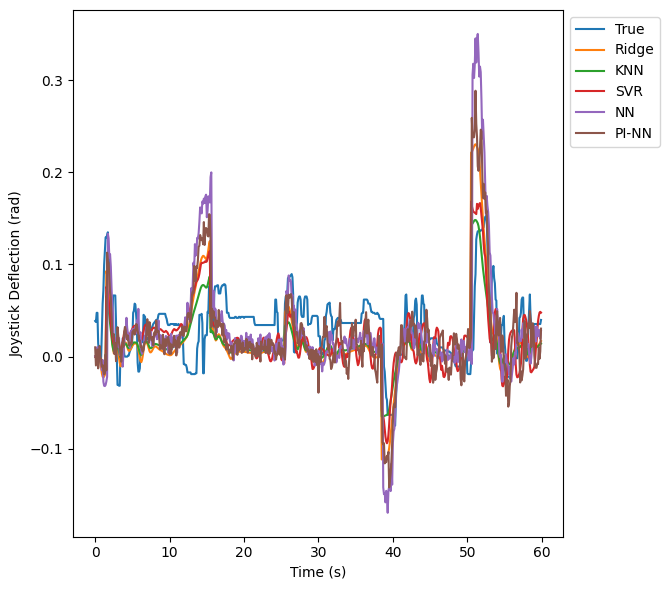

In [155]:
plt.figure(figsize=(8,6))
plt.plot(time[:600],pilot_output_tensor_1[:1000][:600],label = 'True')
plt.plot(time[:600],pilot_estimated_ridge_1[:600],label='Ridge' )
#plt.plot(time[:600],pilot_estimated_dt_1[:600],label='DT' )
plt.plot(time[:600],pilot_estimated_knn_1[:600],label='KNN')
#plt.plot(time[:600],pilot_estimated_rf_1[:600],label='RF' )
plt.plot(time[:600],pilot_estimated_svr_1[:600],label='SVR')

plt.plot(time[:600],pilot_estimated_dense_nn_1[:600],label='NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_1[:600],label='RNN')
#plt.plot(time[:600],pilot_estimated_cnn_1[:600],label='CNN')

plt.plot(time[:600],pilot_estimated_dense_nn_pi_1[:600],label='PI-NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_pi_1[:600],label='PI-RNN')
#plt.plot(time[:600],pilot_estimated_cnn_pi_1[:600],label='PI-CNN' )
plt.ylabel('Joystick Deflection (rad)')
plt.xlabel('Time (s)')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor for placement

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Optional: Prevent legend from overlapping

# Show plot
plt.show()


In [ ]:
all_simulator_results_1 = np.hstack([np.array(pilot_output_tensor_1), ])

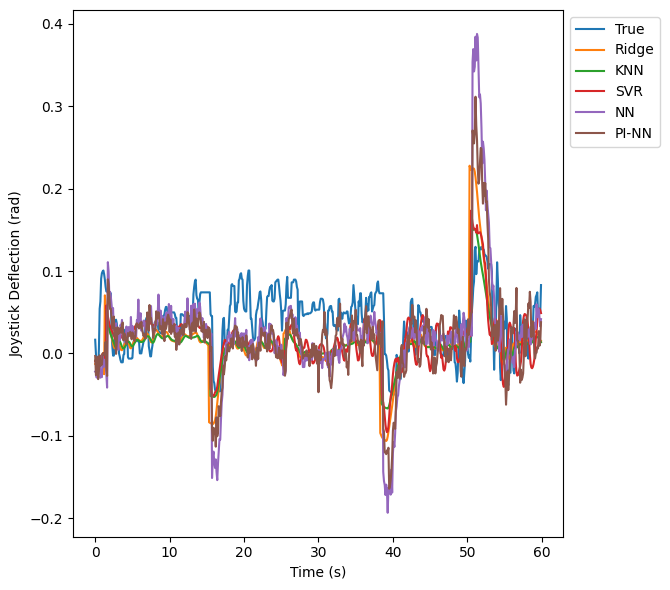

In [156]:
plt.figure(figsize=(8,6))
plt.plot(time[:600],pilot_output_tensor_2[:1000][:600],label = 'True')
plt.plot(time[:600],pilot_estimated_ridge_2[:600],label='Ridge' )
#plt.plot(time[:600],pilot_estimated_dt_1[:600],label='DT' )
plt.plot(time[:600],pilot_estimated_knn_2[:600],label='KNN')
#plt.plot(time[:600],pilot_estimated_rf_1[:600],label='RF' )
plt.plot(time[:600],pilot_estimated_svr_2[:600],label='SVR')

plt.plot(time[:600],pilot_estimated_dense_nn_2[:600],label='NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_1[:600],label='RNN')
#plt.plot(time[:600],pilot_estimated_cnn_1[:600],label='CNN')

plt.plot(time[:600],pilot_estimated_dense_nn_pi_2[:600],label='PI-NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_pi_1[:600],label='PI-RNN')
#plt.plot(time[:600],pilot_estimated_cnn_pi_1[:600],label='PI-CNN' )
plt.ylabel('Joystick Deflection (rad)')
plt.xlabel('Time (s)')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor for placement

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Optional: Prevent legend from overlapping

# Show plot
plt.show()

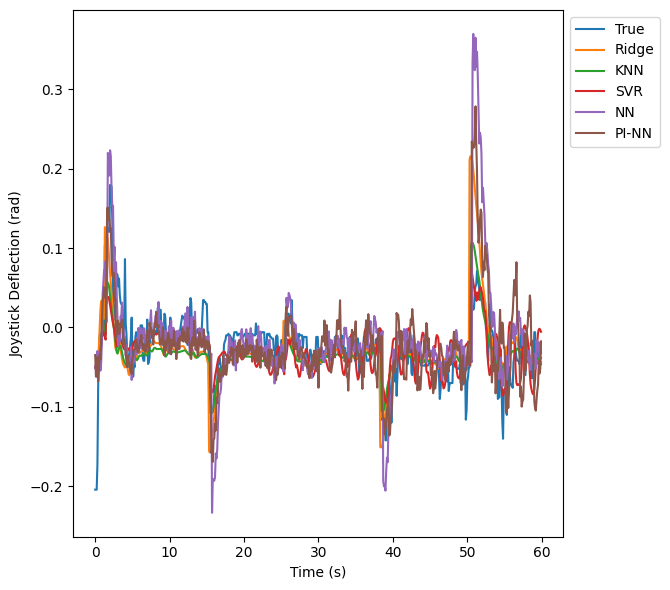

In [158]:
plt.figure(figsize=(8,6))
plt.plot(time[:600],pilot_output_tensor_3[:1000][:600],label = 'True')
plt.plot(time[:600],pilot_estimated_ridge_3[:600]-0.05,label='Ridge' )
#plt.plot(time[:600],pilot_estimated_dt_1[:600],label='DT' )
plt.plot(time[:600],pilot_estimated_knn_3[:600]-0.05,label='KNN')
#plt.plot(time[:600],pilot_estimated_rf_1[:600],label='RF' )
plt.plot(time[:600],pilot_estimated_svr_3[:600]-0.05,label='SVR')

plt.plot(time[:600],pilot_estimated_dense_nn_3[:600]-0.05,label='NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_1[:600],label='RNN')
#plt.plot(time[:600],pilot_estimated_cnn_1[:600],label='CNN')

plt.plot(time[:600],pilot_estimated_dense_nn_pi_3[:600]-0.05,label='PI-NN')
#plt.plot(time[:600],pilot_estimated_rnn_nn_pi_pi_1[:600],label='PI-RNN')
#plt.plot(time[:600],pilot_estimated_cnn_pi_1[:600],label='PI-CNN' )
plt.ylabel('Joystick Deflection (rad)')
plt.xlabel('Time (s)')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor for placement

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Optional: Prevent legend from overlapping

# Show plot
plt.show()

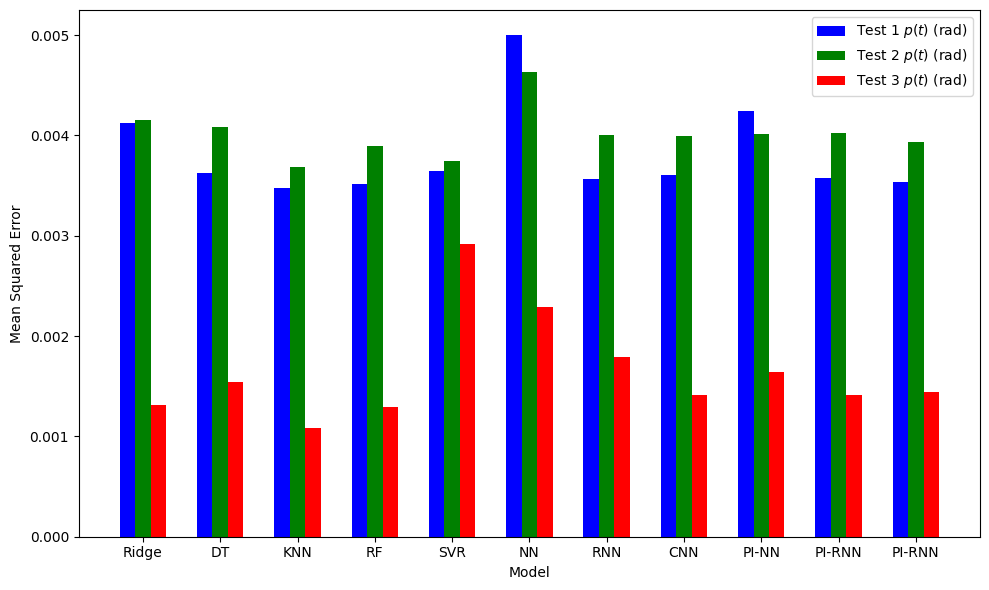

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
#models = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
models = ['Ridge', 'DT', 'KNN', 'RF', 'SVR', 'NN', 'RNN', 'CNN', 'PI-NN', 'PI-RNN', 'PI-RNN']
mse_test1 = [0.00412, 0.00363, 0.00348, 0.00352, 0.00365, 0.0050, 0.003566, 0.00361, 0.00424, 0.00358, 0.00354]
mse_test2 = [0.00415, 0.00408, 0.00369, 0.00389, 0.00374, 0.00463, 0.0040, 0.00399, 0.00401, 0.00402, 0.00393]
mse_test3 = [0.00131, 0.00154, 0.00108, 0.00129, 0.00292, 0.00229, 0.00179, 0.00141, 0.00164, 0.00141, 0.00144]

# Set the width of the bars
width = 0.2

# Create an array for the positions of the bars
x = np.arange(len(models))

# Plot
plt.figure(figsize=(10, 6))

# Plot MSE for each test
plt.bar(x - width, mse_test1, width, label='Test 1 $p(t)$ (rad)', color='b')
plt.bar(x, mse_test2, width, label='Test 2 $p(t)$ (rad)', color='g')
plt.bar(x + width, mse_test3, width, label='Test 3 $p(t)$ (rad)', color='r')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
#plt.title('Comparison of Mean Squared Error (MSE) Across Models')
plt.xticks(x, models)  # Set model numbers as x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
